## Task 1: KEGG and gene id mapping

Familiarize yourself with the KEGG Rest interface and how to access it with Biopyhton:

http://www.genome.jp/kegg/rest/keggapi.html

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

In [1]:
from Bio import SeqIO
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral
from IPython.display import Image, HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Subtask 1.1 Extract gene lists for all (mouse) KEGG pathways and store them in a suitable Python data structure

In [5]:
print(kegg_list('pathway','mmu').read())

path:mmu00010	Glycolysis / Gluconeogenesis - Mus musculus (mouse)
path:mmu00020	Citrate cycle (TCA cycle) - Mus musculus (mouse)
path:mmu00030	Pentose phosphate pathway - Mus musculus (mouse)
path:mmu00040	Pentose and glucuronate interconversions - Mus musculus (mouse)
path:mmu00051	Fructose and mannose metabolism - Mus musculus (mouse)
path:mmu00052	Galactose metabolism - Mus musculus (mouse)
path:mmu00053	Ascorbate and aldarate metabolism - Mus musculus (mouse)
path:mmu00061	Fatty acid biosynthesis - Mus musculus (mouse)
path:mmu00062	Fatty acid elongation - Mus musculus (mouse)
path:mmu00071	Fatty acid degradation - Mus musculus (mouse)
path:mmu00072	Synthesis and degradation of ketone bodies - Mus musculus (mouse)
path:mmu00100	Steroid biosynthesis - Mus musculus (mouse)
path:mmu00120	Primary bile acid biosynthesis - Mus musculus (mouse)
path:mmu00130	Ubiquinone and other terpenoid-quinone biosynthesis - Mus musculus (mouse)
path:mmu00140	Steroid hormone biosynthesis - Mus musculus

In [6]:
'''
def get_genes_from_pathways(organism_identifier='mmu'):
     This function gets a list of gene identifiers from the pathways of the given organism.
    
        organism_identifier: the organism to search for
    
    
    
    # get a list of all pathways
    pathway_list = kegg_list('pathway','mmu').read().split("\n")

    # list to store the pathways 
    list_of_pathway_genes = []
    
    # path:mmu05416    Viral myocarditis - Mus musculus (mouse)
    # iterate over the pathways
    for pathway_entry in pathway_list[:-1]:
        
        # path:mmu05416
        pw = pathway_entry.split()[0]
        
        list_of_pathway_genes.append((pw , get_genes_from_pathway(pw)))
        #break
    
    return list_of_pathway_genes
 '''   

'\ndef get_genes_from_pathways(organism_identifier=\'mmu\'):\n     This function gets a list of gene identifiers from the pathways of the given organism.\n    \n        organism_identifier: the organism to search for\n    \n    \n    \n    # get a list of all pathways\n    pathway_list = kegg_list(\'pathway\',\'mmu\').read().split("\n")\n\n    # list to store the pathways \n    list_of_pathway_genes = []\n    \n    # path:mmu05416    Viral myocarditis - Mus musculus (mouse)\n    # iterate over the pathways\n    for pathway_entry in pathway_list[:-1]:\n        \n        # path:mmu05416\n        pw = pathway_entry.split()[0]\n        \n        list_of_pathway_genes.append((pw , get_genes_from_pathway(pw)))\n        #break\n    \n    return list_of_pathway_genes\n '

In [7]:
#pathway_genes_mmu = get_genes_from_pathways()

In [8]:
#pathway_genes_mmu

In [9]:
''' NOT USED ANYMORE!

def get_genes_from_pathway(pathway_to_search):
    
    
    
    
    
    kegg_results = kegg_link('genes', pathway_to_search).read().split("\n")
    
    genes_of_pathway = ""
    
    # gene_row: path:mmu00010 \t mmu:100042025
    for gene_row in kegg_results[:-1]:
        
        # mmu:100042025 -> 100042025
        gene_id = gene_row.split("\t")[1].split(":")[1]
            
        genes_of_pathway = genes_of_pathway + gene_id + ","
        
    return genes_of_pathway[:-1]    '''
    
    
    

' NOT USED ANYMORE!\n\ndef get_genes_from_pathway(pathway_to_search):\n    \n    \n    \n    \n    \n    kegg_results = kegg_link(\'genes\', pathway_to_search).read().split("\n")\n    \n    genes_of_pathway = ""\n    \n    # gene_row: path:mmu00010 \t mmu:100042025\n    for gene_row in kegg_results[:-1]:\n        \n        # mmu:100042025 -> 100042025\n        gene_id = gene_row.split("\t")[1].split(":")[1]\n            \n        genes_of_pathway = genes_of_pathway + gene_id + ","\n        \n    return genes_of_pathway[:-1]    '

In [10]:
#get_genes_from_pathway('mmu00010')

In [11]:
def get_gene_from_pathway_by_parsing(pathway_):
    ''' This function gets the genes for one pathway by parsing the kegg_entry
    
        pathway_: the pathway to get the genes from
    
    '''
    
    # try to parse the kegg entry
    try:
        kegg_entry = kegg_get(pathway_).read().replace("COMPOUND", "GENE").split("GENE")[1].split("\n")
    except:
        print("kegg entry: " + str(kegg_get(pathway_).read()))
        return
    
    # lists storing the kegg ids and gene names
    list_of_kegg_ids_ = []
    list_of_gene_names_ = []
    
    # iterate over kegg_entry and skip last element
    for gene_entry in kegg_entry[:-1]:
        
        # add kegg_id and gene_name to lists, if there is one
        try:
            list_of_kegg_ids_.append(gene_entry.split()[0])
            list_of_gene_names_.append(gene_entry.split()[1][:-1])
        except:
            print("gene entry: " + str(gene_entry))
        
    return(list_of_kegg_ids_, list_of_gene_names_)
    

In [12]:
def get_genes_from_pathways_by_parsing(organism_identifier='mmu'):
    ''' This function gets a list of gene identifiers from the pathways of the given organism.
    
        organism_identifier: the organism to search for
    
    '''
    
    # get a list of all pathways
    pathway_list = kegg_list('pathway','mmu').read().split("\n")

    # list to store the pathways 
    list_of_pathway_genes = []
    
    # path:mmu05416    Viral myocarditis - Mus musculus (mouse)
    # iterate over the pathways
    for pathway_entry in pathway_list[:-1]:
        
        # path:mmu05416
        pw = pathway_entry.split()[0]
        
        # get the gene from the pathway by parsing the kegg string
        genes = get_gene_from_pathway_by_parsing(pw)
        
        # append only if genes is valid
        if not genes is None:
            list_of_pathway_genes.append((pw , genes[0], genes[1]))
        
        
    return list_of_pathway_genes
    

In [13]:
pathways_genes_ids = get_genes_from_pathways_by_parsing()

gene entry: ///
gene entry: ///
gene entry: ///
kegg entry: ENTRY       mmu01100                    Pathway
NAME        Metabolic pathways - Mus musculus (mouse)
PATHWAY_MAP mmu01100  Metabolic pathways
ORGANISM    Mus musculus (mouse) [GN:mmu]
KO_PATHWAY  ko01100
///

kegg entry: ENTRY       mmu01200                    Pathway
NAME        Carbon metabolism - Mus musculus (mouse)
DESCRIPTION Carbon metabolism is the most basic aspect of life. This map presents an overall view of central carbon metabolism, where the number of carbons is shown for each compound denoted by a circle, excluding a cofactor (CoA, CoM, THF, or THMPT) that is replaced by an asterisk. The map contains carbon utilization pathways of glycolysis (map00010), pentose phosphate pathway (map00030), and citrate cycle (map00020), and six known carbon fixation pathways (map00710 and map00720) as well as some pathways of methane metabolism (map00680). The six carbon fixation pathways are: (1) reductive pentose phosphate cy

In [14]:
kegg_list('path:mmu00010').read()

'path:mmu00010\tGlycolysis / Gluconeogenesis - Mus musculus (mouse)\n'

In [15]:
def create_dataframe_from_list(pathway_genes_mmu_):
    ''' This function creates a dataframe from the given list.
    
        pathway_genes_mmu_: the list to create the dataframe from   
    '''
    
    # get the pathway IDs
    pathway_list = [item[0] for item in pathway_genes_mmu_]
    
    # list to store the description
    desc_list = []
    
    # iterate over each pathway
    for a in pathway_list:
        
        # store the description in the list
        desc_list.append(kegg_list(a).read().split("\t")[1])
       
    # get the first entry of the pathway_genes_mmu_ (=pathway IDs)
    pathway_list = [item[0] for item in pathway_genes_mmu_]
    
    # get the second entry of the pathway_genes_mmu_ (=gene IDs)
    gene_list = [item[1] for item in pathway_genes_mmu_]
    
    # get the third entry of the pathway_genes_mmu_ (=gene names)
    gene_name = [item[2] for item in pathway_genes_mmu_]
    
    return pd.DataFrame({"Pathway ID" : pathway_list,
                         "Gene ID" : gene_list,
                         "Gene Name" : gene_name,  
                         "Description": desc_list })

In [16]:
pathways_genes_ids_df = create_dataframe_from_list(pathways_genes_ids)

In [17]:
pathways_genes_ids_df.head()

,Description,Gene ID,Gene Name,Pathway ID
0,Glycolysis / Gluconeogenesis - Mus musculus (m...,"[15277, 212032, 15275, 216019, 103988, 14751, ...","[Hk2, Hk3, Hk1, Hkdc1, Gck, Gpi1, Pfkl, Pfkm, ...",path:mmu00010
1,Citrate cycle (TCA cycle) - Mus musculus (mous...,"[12974, 71832, 104112, 11429, 11428, 15926, 26...","[Cs, Csl, Acly, Aco2, Aco1, Idh1, Idh2, Idh3g,...",path:mmu00020
2,Pentose phosphate pathway - Mus musculus (mous...,"[14751, 14380, 14381, 66171, 100198, 110208, 6...","[Gpi1, G6pd2, G6pdx, Pgls, H6pd, Pgd, Rpe, Tkt...",path:mmu00030
3,Pentose and glucuronate interconversions - Mus...,"[110006, 16591, 22238, 22236, 94284, 94215, 39...","[Gusb, Kl, Ugt2b5, Ugt1a2, Ugt1a6a, Ugt2a1, Ug...",path:mmu00040
4,Fructose and mannose metabolism - Mus musculus...,"[110119, 54128, 29858, 331026, 69080, 218138, ...","[Mpi, Pmm2, Pmm1, Gmppb, Gmppa, Gmds, Tsta3, F...",path:mmu00051


### Subtask 1.2: Save the KEGG gene sets as a gmt file after you made sure they have the proper gene ids with respect to your DE analysis

hints: 

http://biopython.org/wiki/Annotate_Entrez_Gene_IDs

http://www.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats

In [18]:
def write_gmt_file(dataframe_to_write, filename_):
    ''' This function writes the dataframe_to_write as .gmt file.
        
        dataframe_to_write: the dataframe to write
        filename_: the filename to write to 
    
    '''

    # gmt file:
    # pro zeile: 1 pathway
    # name \t descp \t gene1 \t gene2 \t gene3 etc

    # open filename_
    with open(filename_, "w") as gmt_file:
        
        # iterate over dataframe
        for index, row in dataframe_to_write.iterrows():
            
            # get the genes to write
            genes_to_write = row['Gene Name']
            
            # genes_to_write is a list -> convert it to string
            genes_to_write_str = ",".join(genes_to_write)
            
            # desc_to_write_str is a list -> convert it to string
            desc_to_write_str = "".join(row['Description'])
            
            # replace new line
            desc_to_write_str = desc_to_write_str.replace("\n","")
            
            # genes are ","-separated, but need to be "\t"-separated
            genes_to_write_str = genes_to_write_str.replace(",", "\t")
            
            # create the string to write
            string_to_write = row['Pathway ID'] + "\t" + desc_to_write_str + "\t" + genes_to_write_str + "\n"

            # write string to file
            gmt_file.write(string_to_write)
            
    print("File " + filename_ + " has been succesfully written.")        

In [19]:
write_gmt_file(pathways_genes_ids_df, "results\kegg_mmu_pathway_genes.gmt")

File results\kegg_mmu_pathway_genes.gmt has been succesfully written.


In [20]:
#write_gmt_file(kegg_mmu_pathway_df, "results\kegg_mmu_pathway_genes.gmt")

## Task 2: Gene Set Enrichment

### Subtask 2.1: Read in the csv file you produced during the Differential Expression module, extract a gene list (as a python list of gene symbols) from your favorite multiple correction column (and store it in a variable)

In [21]:
fold_change_df = pd.read_csv("results/diff_expr_genes_fold_change.csv")

In [22]:
fold_change_df.head()

,gene,pvalue,sidak,holm-sidak,holm,simes-hochberg,hommel,fdr_bh,fdr_by,fdr_tsbh,fdr_tsbky,log2 fold change
0,39872,6.265481e-11,0.000001,0.000001,0.000001,0.000001,0.000001,2.388628e-09,2.524413e-08,1.055814e-09,1.121471e-09,-0.065622
1,39873,6.018315e-04,0.999998,0.999883,1.000000,0.500000,0.500000,1.932383e-03,2.042232e-02,8.541462e-04,9.072615e-04,-0.015217
2,39874,3.164228e-02,1.000000,1.000000,1.000000,0.500000,0.500000,5.533046e-02,5.847579e-01,2.445701e-02,2.597787e-02,0.010690
3,39875,1.384384e-01,1.000000,1.000000,1.000000,0.500000,0.500000,1.868879e-01,1.000000e+00,8.260765e-02,8.774463e-02,-0.008591
4,39876,3.676499e-05,0.551901,0.469274,0.633498,0.500000,0.343017,1.739348e-04,1.838224e-03,7.688215e-05,8.166309e-05,0.020228


In [23]:
fold_change_genes = fold_change_df['gene']

In [24]:
fold_change_genes.head()

0    39872
1    39873
2    39874
3    39875
4    39876
Name: gene, dtype: object

### Subtask 2.2: Perform gene set enrichment (Fisher's exact test or an hypergeometric test will do for our purposes) with the KEGG gene sets you extracted in Task 1 (you may want to store the results in a pandas dataframe and write them to csv)

hint:

https://genetrail2.bioinf.uni-sb.de/help?topic=set_level_statistics

In [25]:
# get all genes stored in the pathways_genes_ids_df and store them in set
set_pathway_genes = set([i for sublist in pathways_genes_ids_df['Gene Name'] for i in sublist])

# get all genes stored in the fold_change_genes dataframe and store them in set
set_fold_change_genes = set(fold_change_genes)

# all genes in both sets
in_both_sets = set_pathway_genes & set_fold_change_genes

# 
print("There are " + str(len(in_both_sets)) + " genes in both sets.")

There are 7106 genes in both sets.


In [76]:
def intersect_dataframes(df_pathway_1, df_fold_change_2):
    
    # todo: fixen
    # fehler bei set_df1!!!!!!
    
    #print(type(df_pathway_1))
    
    #print(df_pathway_1)
    
    # todo: nicht über direkten index zugreifen, sondern über 'Gene name'
    
    
    #print(df_pathway_1['Gene Name'])
    
    try:
        #set_df1 = set(df_pathway_1[2])
        #set_df1 = set([i for sublist in df_pathway_1[2] for i in sublist])
        set_df1 = set([i for i in df_pathway_1[2]])
    except:
        #set_df1 = set(df_pathway_1['Gene Name'])
        set_df1 = set([i for sublist in df_pathway_1['Gene Name'] for i in sublist])
        #temp_list = df_pathway_1['Gene Name']
        #print(temp_list)
        #set_df1 = set([i for i in temp_list])

    #print(df_pathway_1[2])#.index['Gene name'])
    
    # get all genes stored in the pathways_genes_ids_df and store them in set
    #set_df1 = set([i for sublist in df_pathway_1['Gene Name'] for i in sublist])

    # get all genes stored in the fold_change_genes dataframe and store them in set
    set_df2 = set(df_fold_change_2)

    #print(set_df1)
    #print(set_df2)
    
    # all genes in both sets
    return set_df1 & set_df2
    

In [70]:
pathways_genes_ids_df_pw_index = pathways_genes_ids_df.set_index('Pathway ID')

In [71]:
pathways_genes_ids_df_pw_index.loc['path:mmu00010']

Description    Glycolysis / Gluconeogenesis - Mus musculus (m...
Gene ID        [15277, 212032, 15275, 216019, 103988, 14751, ...
Gene Name      [Hk2, Hk3, Hk1, Hkdc1, Gck, Gpi1, Pfkl, Pfkm, ...
Name: path:mmu00010, dtype: object

In [72]:
#pathways_genes_ids_df['Gene Name']

In [79]:
# get rid of all genes which are not existing in the pathway
intersection_pathway_fold_change = intersect_dataframes(pathways_genes_ids_df, set_fold_change_genes)
#intersection_pathway_fold_change

In [85]:
from scipy.stats import hypergeom

In [148]:
def perform_gene_set_enrichment(fold_change_df_, pathway_genes_df_):
    ''' This function performs a gene set enrichment on a sinle pathway.
    
    '''
    
    #print(fold_change_df_[fold_change_df_['sidak'] < 0.05])
    
    #D = fold_change_df_[fold_change_df_['sidak'] < 0.05]['gene']
    #P = pathway_genes_df_['Gene Name']
    #G = fold_change_df_[fold_change_df_['sidak'] > 0.05]['gene']

    # differentially expressed genes 
    D = fold_change_df_[fold_change_df_['holm-sidak'] < 0.05].index  
    
    # pathway genes
    P = pathway_genes_df_['Gene Name']
    
    # not differentially expressed genes
    G = fold_change_df_[fold_change_df_['holm-sidak'] > 0.05].index

    # D united with P
    D_and_P = len(intersect_dataframes(pathway_genes_df_, D))
    
    # D united with not P
    D_and_not_P = len(D)-D_and_P
    
    # not D united with P
    not_D_and_P = len(intersect_dataframes(pathway_genes_df_, G))
    
    # not D united with not P
    not_D_and_not_P = len(G)-not_D_and_P
    
    # create the contingency table
    table = pd.DataFrame({'Diff. expr.' : pd.Series([D_and_P, D_and_not_P, D_and_P+D_and_not_P], 
                                                   index=['in PW', 'Not in PW', 'Total']),
                         'Not Diff. expr.' : pd.Series([not_D_and_P, not_D_and_not_P, not_D_and_P+not_D_and_not_P], 
                                                index=['in PW', 'Not in PW', 'Total']),
                         'Total' : pd.Series([D_and_P+not_D_and_P, D_and_not_P+not_D_and_not_P, 
                                              D_and_P+D_and_not_P+not_D_and_P+not_D_and_not_P], 
                                             index=['in PW', 'Not in PW', 'Total'])})
    
    # # genes differentially expressed
    n = len(D)
    
    # # genes diff. expr. AND in pathway
    k = D_and_P
    
    # total number of genes 
    m = D_and_P+D_and_not_P+not_D_and_P+not_D_and_not_P
    
    # # genes in pathway
    l = D_and_P+not_D_and_P
    
    # compute p-value:
    k_ = l*n/m
    if k_ >= k:
        p_value = hypergeom.cdf(k,m,l,n)
    else:
        p_value = hypergeom.sf(k-1,m,l,n)
    
    
    return p_value
    

In [149]:
def perform_gene_set_enrichment_all_pathways(fold_change_df_, _pathway_genes_df_):
    ''' This function performs a gene set enrichment on all pathways stored in the _pathway_genes_df_ Dataframe.
    
        fold_change_df_: the dataframe containing the differential expression data
        _pathway_genes_df_: the dataframe containing the pathways and their corresponding genes
    '''
    
    # lists to create the dataframe
    list_of_pathways = []
    list_of_p_values = []
    
    # iterate over all pathways
    for pw_name, pathway in _pathway_genes_df_.iterrows():
        
        # append the pathway id
        list_of_pathways.append(pw_name)
        
        # compute the p-value for the given pathway
        list_of_p_values.append(perform_gene_set_enrichment(fold_change_df_, pathway))
    
    return pd.DataFrame({'Pathway' : list_of_pathways, 
                         'p-value' : list_of_p_values}) 

In [150]:
gene_set_enrichment_p_values = perform_gene_set_enrichment_all_pathways(fold_change_filtered, pathways_genes_ids_df_pw_index)

In [133]:
len(gene_set_enrichment_p_values)

294

In [102]:
gene_set_enrichment_p_values.head()

,Pathway,p-value
0,path:mmu00010,0.107967
1,path:mmu00020,0.066672
2,path:mmu00030,0.415006
3,path:mmu00040,0.060025
4,path:mmu00051,0.275721


In [152]:
gene_set_enrichment_p_values[gene_set_enrichment_p_values['p-value'] < 0.05].sort_values(by='p-value')

,Pathway,p-value
189,path:mmu04740,2.530012e-15
288,path:mmu05332,6.920946e-04
287,path:mmu05330,1.678600e-03
123,path:mmu04120,1.983666e-03
231,path:mmu05012,2.396693e-03
214,path:mmu04940,2.562391e-03
127,path:mmu04141,3.887648e-03
94,path:mmu03040,4.288771e-03
88,path:mmu03013,5.884330e-03
150,path:mmu04390,9.063634e-03


In [107]:
# set 'gene' as index for the fold change dataframe
fc_df_gene_index = fold_change_df.set_index('gene')

# get only the entries which are existent in the pathway dataframe
fold_change_filtered = fc_df_gene_index.loc[list(intersection_pathway_fold_change)]

# perform gene set enrichment
perform_gene_set_enrichment(fold_change_filtered, pathways_genes_ids_df_pw_index.loc['path:mmu05414'])

0.18161919075597432

In [93]:
pathways_genes_ids_df_pw_index.loc['path:mmu05414']

Description      Dilated cardiomyopathy - Mus musculus (mouse)\n
Gene ID        [109700, 16398, 16399, 16400, 16401, 16402, 16...
Gene Name      [Itga1, Itga2, Itga2b, Itga3, Itga4, Itga5, It...
Name: path:mmu05414, dtype: object

In [83]:
#perform_gene_set_enrichment(fold_change_df, pathways_genes_ids_df)

In [256]:
#fold_change_genes

In [254]:
len(fold_change_genes)

21834

In [184]:
len(fold_change_df[fold_change_df['sidak'] < 0.05])

3106

### Subtask 2.3: Extract a list of significantly (at 0.05 significance) enriched KEGG pathways

In [153]:
gene_set_enrichment_p_values[gene_set_enrichment_p_values['p-value'] < 0.05].sort_values(by='p-value')

,Pathway,p-value
189,path:mmu04740,2.530012e-15
288,path:mmu05332,6.920946e-04
287,path:mmu05330,1.678600e-03
123,path:mmu04120,1.983666e-03
231,path:mmu05012,2.396693e-03
214,path:mmu04940,2.562391e-03
127,path:mmu04141,3.887648e-03
94,path:mmu03040,4.288771e-03
88,path:mmu03013,5.884330e-03
150,path:mmu04390,9.063634e-03


## Task 3: KEGG map visualization

#### hint:

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

#### remark:

In real life you may want to use the R-based tool pathview: https://bioconductor.org/packages/release/bioc/html/pathview.html (if you insist you can also try to use r2py for using pathview from Python during the practical)

For Python (in addition to the Biopyhton module) https://github.com/idekerlab/py2cytoscape in combination with https://github.com/idekerlab/KEGGscape may be another alternative (in the future)

Generally speaking, it is always a good idea to pay attention also to other pathway databases like Reactome or WikiPathways ...

### Subtask 3.1: Pick some significantly enriched KEGG pathways of your choice from 2.3 and visualize them

In [157]:
#kegg_get("mmu04740").read()

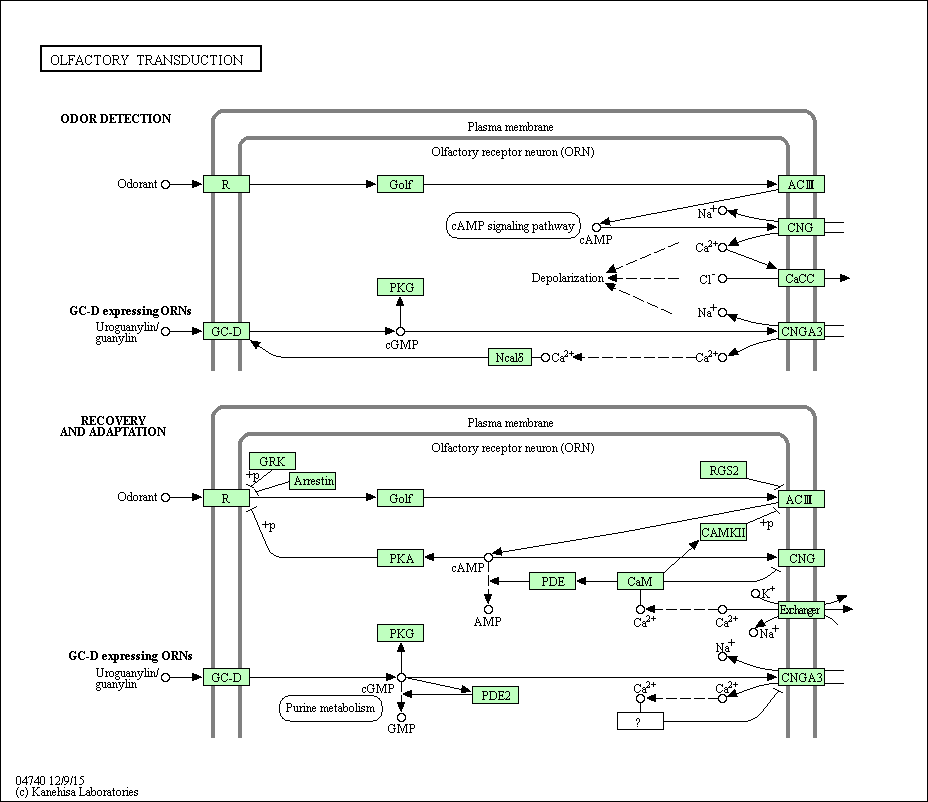

In [154]:
Image(kegg_get("mmu04740", "image").read())

In [159]:
# Helper function to convert colour as RGB tuple to hex string
def rgb_to_hex(rgb):
    rgb = tuple([int(255*val) for val in rgb])
    return '#' + ''.join([hex(val)[2:] for val in rgb]).upper()

In [164]:

# A bit of code that will help us display the PDF output
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

### Subtask 3.2: Define a a suitable binary color scheme respresenting the fact whether a gene is significantly expressed or not

hint: 

http://www.rapidtables.com/web/color/RGB_Color.htm

In [ ]:
# #FF0000 if gene is diff. expressed

### Subtask 3.3: Visualize the pathway(s) from 3.1 in such a way that the included genes have the corresponding color from 3.2 ( you may need to define a suitable mapping from single genes to what is actually shown in the pathway map...)

In [187]:
# list storing the differentially expressed genes
fold_change_filtered.index

Index([u'Plekhg5', u'Nampt', u'Man2a2', u'Shank3', u'Shank2', u'Shank1',
       u'Syt1', u'Pmvk', u'Abcb1a', u'Klc3',
       ...
       u'Bmp2', u'Rxrg', u'Rxra', u'Ddx20', u'Chst1', u'Chst3', u'Chst2',
       u'Chst5', u'Chst4', u'Chst7'],
      dtype='object', name=u'gene', length=7106)

In [215]:
pathway = KGML_parser.read(kegg_get("mmu04740", "kgml"))
canvas = KGMLCanvas(pathway, import_imagemap=True)

for gene in pathway.genes:
    
    is_gene_diff_expr = False
    
    # get the list of all kegg ids for the given gene
    list_of_all_kegg_ids_for_gene = gene.name.split()
    
    # get gene name for the kegg_id
    for kegg_id_ in list_of_all_kegg_ids_for_gene:
        
        # get list of all gene names for the given kegg id
        gene_names = kegg_get(kegg_id_).read().replace("DEFINITION", "NAME").split("NAME")[1].strip().split(",")
        
        # iterate over each gene_name
        for gene_name in gene_names:
            
            # check if gene is diff. expressed
            if gene_name in fold_change_filtered.index:
                
                if fold_change_filtered.loc[gene_name]['holm-sidak'] < 0.05:
                    is_gene_diff_expr = True
                    for graphic in gene.graphics:
                        graphic.bgcolor = '#FF0000'
                break
        
        if is_gene_diff_expr:
            break


In [216]:
canvas.draw("figures/test_new_colors.pdf")
PDF("figures/test_new_colors.pdf")

### Subtask 3.4: Define a suitable continuous color range representing the log2 fold changes of the all the genes in your data

hint:

http://bsou.io/posts/color-gradients-with-python

In [239]:
#fold_change_filtered

In [234]:
fold_change_filtered.loc['Bmp7']

pvalue              0.000799
sidak               1.000000
holm-sidak          0.999992
holm                1.000000
simes-hochberg      0.500000
hommel              0.500000
fdr_bh              0.002459
fdr_by              0.025983
fdr_tsbh            0.001087
fdr_tsbky           0.001154
log2 fold change    0.024825
Name: Bmp7, dtype: float64

In [233]:
fold_change_filtered.loc['Bmp7']['log2 fold change']

0.024824576474399999

In [238]:
price_change = -0.5
price_change =  price_change ** 2 / (1 + price_change ** 2)
Blues = plt.get_cmap('spectral')
print Blues(price_change)

(0.0, 0.0, 0.86670000000000003, 1.0)


### Subtask 3.5: Visualize the pathway(s) from 3.1 in such a way that the included genes have the corresponding color from 3.4

In [ ]:
def RGB_to_hex(RGB):
    ''' [255,255,255] -> "#FFFFFF" '''
    # Components need to be integers for hex to make sense
    RGB = [int(x) for x in RGB]
    return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])

In [297]:
fc_df_gene_index['log2 fold change'].describe()['min']

-0.40764013647200004

In [298]:
fc_df_gene_index['log2 fold change'].describe()['max']-fc_df_gene_index['log2 fold change'].describe()['min']

0.64631521217800003

In [301]:


# Helper function to convert colour as RGB tuple to hex string
def rgb_to_hex(rgb):
    rgb = tuple([int(255*val) for val in rgb])
    return '#' + ''.join([hex(val)[2:] for val in rgb]).upper()



In [305]:
    
    
    pathway = KGML_parser.read(kegg_get("mmu04740", "kgml"))
    canvas = KGMLCanvas(pathway, import_imagemap=True)


    min_fold_change = fc_df_gene_index['log2 fold change'].describe()['min']
    max_fold_change = fc_df_gene_index['log2 fold change'].describe()['max']
    
    #print
    
    for gene in pathway.genes:
    
        is_gene_diff_expr = False
        
        # get the list of all kegg ids for the given gene
        list_of_all_kegg_ids_for_gene = gene.name.split()
        
        #print(list_of_all_kegg_ids_for_gene)
    
        # get all gene names for the kegg_id
        for kegg_id_ in list_of_all_kegg_ids_for_gene:
        
            # get list of all gene names for the given kegg id
            gene_names = kegg_get(kegg_id_).read().replace("DEFINITION", "NAME").split("NAME")[1].strip().split(",")
        
            # iterate over each gene_name
            for gene_name in gene_names:
            
                # check if gene is in dataframe 
                if gene_name in fc_df_gene_index.index:
                    
                    # get the log_2_fold_change
                    log_2_fold_change = fc_df_gene_index.loc[gene_name]['log2 fold change']
                    
                    # map log_2_fold_change to [0,1]
                    log_2_fold_change = (log_2_fold_change + (-min_fold_change)) / (max_fold_change-min_fold_change)
                        
                    # print(log_2_fold_change) 
                    
                    # color map
                    #color_map = plt.get_cmap('spectral')
                    color_map = plt.get_cmap('RdYlGn')
                    
                    
                    # get the rbg color from the color map
                    rbg_color = color_map(log_2_fold_change)
                    
                    # get the hex value for the color
                    hex_value = rgb_to_hex(rbg_color)
                    
                        
                    is_gene_diff_expr = True
                    
                    # 
                    for graphic in gene.graphics:
                        graphic.bgcolor = hex_value
                    
                    # value has been found
                    break
        
            if is_gene_diff_expr:
                break
            
    canvas.draw("figures/fold_change.pdf")
    PDF("figures/fold_change.pdf")        
       
    #return canvas       
    
    